## **Importing files and libraries**

### Libraries

In [1]:
# For Data
import os
#import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#from datetime import datetime
from scipy import  fftpack
#from re import split
import emd
from scipy import ndimage
import statistics


import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import ARResults
from arch import arch_model



import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import style
from mpl_toolkits.mplot3d import axes3d

# Distributions
#from scipy import stats
#import inspect
#from statsmodels.distributions.empirical_distribution import ECDF

# matplotlib Settings
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# warnings Settings
import warnings
warnings.filterwarnings('ignore')


#Others
from IPython.display import Image
#import numpy as np
#import scipy.fftpack as fourier
#import matplotlib.pyplot as plt
#import scipy.io.wavfile as waves

### Files

#### Load

In [2]:
# Verificar el directorio actual
print("Directorio actual:", os.getcwd())

# Cambiar al directorio superior (bajar un nivel)
os.chdir('../..')

# Verificar el nuevo directorio
print("Nuevo directorio actual:", os.getcwd())

Directorio actual: d:\lenovo\Documents\GitHub\Energy-and-linear-momentum-change-exerted-by-the-solar-wind-for-applications-in-electric-solar-sails\Codes\Past
Nuevo directorio actual: d:\lenovo\Documents\GitHub\Energy-and-linear-momentum-change-exerted-by-the-solar-wind-for-applications-in-electric-solar-sails


In [3]:
#Function for simply the files load
def dir(r_or_p, year):
    rp = ("Raw", "Calibrated",)
    r_or_p = r_or_p.strip().capitalize()
    if r_or_p not in rp: #Validate data
        raise NameError("Only Raw or Processed")

    if r_or_p == rp[0]:
      dir = f"Data/Raw_converter/{year}.parquet"
      return dir

    else:
      dir = f"Data/Processing_converter/{year}.parquet"

      return dir



In [4]:
#Years that have a analysis
i_year = 1998
f_year = 2023
step_year = 5
other_year = 2000

years = [year for year in range(i_year, f_year + step_year, step_year)] #+ [other_year]

years.sort()

years

[1998, 2003, 2008, 2013, 2018, 2023]

#### Raw data

In [5]:
Raw_data = {}
for year in years:
  Raw_data[year] = pd.read_parquet(dir("Raw",year))


Raw_data

{1998:         YY  MON  DY  DOY:HH:MM:SS     Seconds  SPEED     Np  Vth  N/S  V_He  \
 0       98  Jan   1  001:00:00:30        30.0    361  10.08   32 -0.5   370   
 1       98  Jan   1  001:00:01:00        60.0    358  10.21   31  0.0   366   
 2       98  Jan   1  001:00:01:30        90.0    362  10.08   32 -0.0   371   
 3       98  Jan   1  001:00:02:00       120.0    360  10.09   32 -0.3   369   
 4       98  Jan   1  001:00:02:30       150.0    358  10.71   30 -0.7   366   
 ...     ..  ...  ..           ...         ...    ...    ...  ...  ...   ...   
 619716  98  Dec  21  355:17:27:16  30648436.0    318  13.51   23  5.3   320   
 619717  98  Dec  21  355:17:27:46  30648466.0    317  13.47   23  5.1   320   
 619718  98  Dec  21  355:17:28:16  30648496.0    319  13.08   23  5.1   322   
 619719  98  Dec  21  355:17:28:46  30648526.0    319  11.60   23  5.0   322   
 619720  98  Dec  21  355:17:29:16  30648556.0    324  10.40   23  4.5   327   
 
         GSE_X  GSE_Y  GSE_Z  RA

#### Processed/ Calibrated data

In [6]:
Calibrated_data = {}
for year in years:
  Calibrated_data[year] = pd.read_parquet(dir("Calibrated",year))


Calibrated_data

{1998:        YY  MON  DY  DOY:HH:MM:SS     Seconds  SPEED     Np  Vth  N/S  V_He  \
 0      98  Jan   1  001:00:05:02       302.0    371  10.08   35 -0.8   383   
 1      98  Jan   1  001:00:10:03       603.0    371   9.80   35 -0.9   383   
 2      98  Jan   1  001:00:15:05       905.0    370   9.00   36  0.3   383   
 3      98  Jan   1  001:00:20:11      1211.0    372   7.25   38  1.5   387   
 4      98  Jan   1  001:00:25:10      1510.0    370   8.36   37  0.3   384   
 ...    ..  ...  ..           ...         ...    ...    ...  ...  ...   ...   
 62155  98  Dec  21  355:17:07:38  30647258.0    336  15.01   24  5.6   338   
 62156  98  Dec  21  355:17:12:39  30647559.0    332  14.50   23  3.8   335   
 62157  98  Dec  21  355:17:17:41  30647861.0    334  13.97   24  3.9   337   
 62158  98  Dec  21  355:17:22:43  30648163.0    334  14.58   23  4.7   337   
 62159  98  Dec  21  355:17:27:46  30648466.0    333  13.76   23  4.9   335   
 
        GSE_X  GSE_Y  GSE_Z  RANGE  HGLAT  H

## **Stochastic**

In [346]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.filters.hp_filter import hpfilter
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import STL

# Univariate Autoregressive Processes (AR)
def autoregressive(data_sheet, lag):
    model = AutoReg(data_sheet, lags=lag)
    model_fit = model.fit()
    predictions = model_fit.predict(start=0, end=len(data_sheet)-1)
    return predictions, model_fit

# Autoregressive Moving-Average Processes (ARMA) and Kalman Filter
def arma_process(data_sheet, lag):
    """
    Modela los datos usando un proceso ARMA con el orden especificado (p, q).
    """
    model = ARIMA(data_sheet, order=(lag, lag, 0))
    model_fit = model.fit()
    predictions = model_fit.predict(start=0, end=len(data_sheet)-1)
    return predictions, model_fit

# Exponential Smoothing
def exponential_smoothing(data_sheet, lag=0):
    """
    Modela los datos usando suavizado exponencial.
    """
    trend = [None, "add", "mul", "additive", "multiplicative"]
    seasonal = [None, "add", "mul", "additive", "multiplicative"]

    model = ExponentialSmoothing(data_sheet, seasonal_periods=lag)
    model_fit = model.fit()
    predictions = model_fit.fittedvalues
    return predictions, model_fit

# Statespace Models
def statespace_model(data_sheet, lag):
    """
    Modela los datos usando un modelo de espacio de estados.
    """
    model = SARIMAX(data_sheet, order=(lag, lag, 0))
    model_fit = model.fit()
    predictions = model_fit.predict(start=0, end=len(data_sheet)-1)
    return predictions, model_fit


In [342]:
def find_best_cutoff_frequency(year, column, cutoff_frequencies, filter_func):
    """
    Encuentra la mejor frecuencia de corte para un filtro de paso alto usando métricas de error.
    """
    data_sheet = Raw_data[year][column]
    calibrated_sheet = Calibrated_data[year][column]
    time_raw = Raw_data[year]["Seconds"]
    time_calibrated = Calibrated_data[year]["Seconds"]

    common_time = np.intersect1d(time_raw, time_calibrated)
    idx_raw_common = np.where(np.isin(time_raw, common_time))[0]
    idx_calibrated_common = np.where(np.isin(time_calibrated, common_time))[0]

    mse_errors, mae_errors, r2_scores = [], [], []

    for cutoff_frequency in cutoff_frequencies:
        filtered_data, model = filter_func(data_sheet=data_sheet, lag=int(cutoff_frequency))

        #print(calibrated_sheet.iloc[idx_calibrated_common])
        #print(filtered_data.iloc[idx_raw_common])
        cs = np.nan_to_num(calibrated_sheet.iloc[idx_calibrated_common], nan=0.0, posinf=0.0, neginf=0.0)
        fd = np.nan_to_num(filtered_data.iloc[idx_raw_common], nan=0.0, posinf=0.0, neginf=0.0)
        mse = mean_squared_error(cs, fd)
        mae = mean_absolute_error(cs, fd)
        r2 = r2_score(cs, fd)

        mse_errors.append(mse)
        mae_errors.append(mae)
        r2_scores.append(r2)

    min_mse_index = np.argmin(mse_errors)
    min_mae_index = np.argmin(mae_errors)
    max_r2_index = np.argmax(r2_scores)

    print(f"The maximum R^2 is {r2_scores[max_r2_index]} for lag = {cutoff_frequencies[max_r2_index]}")
    print(f"The minimum MSE is {mse_errors[min_mse_index]} for lag = {cutoff_frequencies[min_mse_index]}")
    print(f"The minimum MAE is {mae_errors[min_mae_index]} for lag = {cutoff_frequencies[min_mae_index]}")


    plt.figure(figsize=(16, 8))
    plt.plot(cutoff_frequencies, mse_errors, label='MSE')
    plt.plot(cutoff_frequencies, mae_errors, label='MAE')
    plt.plot(cutoff_frequencies, r2_scores, label='R²')
    plt.xlabel('Lag')
    plt.ylabel('Error')
    plt.yscale("symlog")
    plt.legend()
    plt.title(f'Error vs Lag for {column}')
    plt.show()

    return cutoff_frequencies[min_mse_index], cutoff_frequencies[min_mae_index], cutoff_frequencies[max_r2_index]


In [344]:
def find_max_lag(data, max_memory_gb=1):
    """
    Encuentra el valor máximo de lag permitido para el modelo AutoReg en base al límite de memoria.
    
    Parameters:
        data (array-like): Datos de entrada para el modelo.
        max_memory_gb (float): Máximo de memoria en GB que se puede usar (ajustable).
    
    Returns:
        int: El máximo valor de lag que el sistema puede manejar.
    """
    max_lag = 0
    memory_per_item = data.nbytes / len(data)  # Tamaño estimado por elemento

    for lag in range(1, len(data)):
        estimated_memory = (lag * len(data)) * memory_per_item / (1024**3)  # Convertimos a GB
        
        if estimated_memory > max_memory_gb:
            break
        max_lag = lag

    return max_lag


Max lag allowed: 4 for SPEED in 2003
The maximum R^2 is 0.9695661688512466 for lag = 4.0
The minimum MSE is 459.98373331377354 for lag = 4.0
The minimum MAE is 16.225886566938872 for lag = 4.0


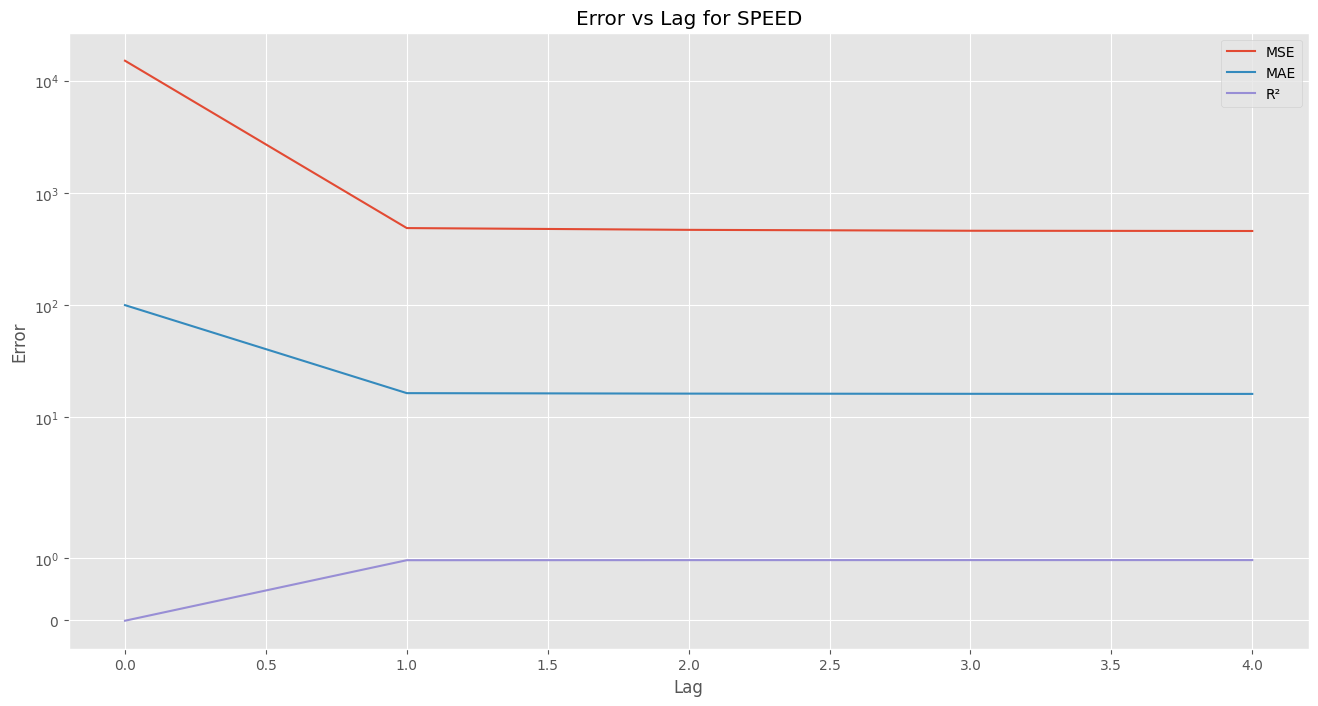

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:              1003100
Model:                     AutoReg(4)   Log Likelihood            -3800786.026
Method:               Conditional MLE   S.D. of innovations             10.699
Date:                Wed, 13 Nov 2024   AIC                        7601584.052
Time:                        17:16:03   BIC                        7601654.964
Sample:                             4   HQIC                       7601603.564
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2330      0.048     25.472      0.000       1.138       1.328
y.L1           0.6443      0.001    648.829      0.000       0.642       0.646
y.L2           0.1500      0.001    127.194      0.0

MemoryError: Unable to allocate 61.2 MiB for an array with shape (8, 1003100) and data type float64

In [347]:
columns = ["SPEED", "Np", "N/S"]
filters = [autoregressive, arma_process, statespace_model, exponential_smoothing]
filters_names = ["AR", "ARIMA", "Statespace", "Exponential Smoothing"]
colors = ["midnightblue", "navy", "darkblue", "mediumblue"]

for year in [2003]:
    for column in columns:
        time = Raw_data[year]["Seconds"]
        data_sheet = np.array(Raw_data[year][column])
        
        max_lag_allowed = find_max_lag(data_sheet, max_memory_gb=0.03125)
        cutoff_frequencies = np.linspace(0, max_lag_allowed, num=max_lag_allowed+1)
        print(f"\nMax lag allowed: {max_lag_allowed} for {column} in {year}")

        Filters = []
        cut_off = []

        for filter_func, filter_name, color in zip(filters, filters_names, colors):
            optimal_mse, optimal_mae, optimal_r2 = find_best_cutoff_frequency(year, column, cutoff_frequencies, filter_func)

            optimal_cutoff = min(optimal_mse, optimal_mae, optimal_r2)
            filtered_signal, model = filter_func(data_sheet=np.array(Raw_data[year][column]), lag=int(optimal_cutoff))
            Filters.append(filtered_signal)
            cut_off.append(optimal_cutoff)
            print(model.summary())

        plt.figure(figsize=(16, 8))
        plt.plot(time, Raw_data[year][column], label=f'Raw {column}', color="limegreen", linewidth=1.2, linestyle="-.", alpha=0.5)
        for filtered_signal, optimal_cutoff, filter_name in zip(Filters, cut_off, filters_names):
            plt.plot(time, filtered_signal, label=f'{column} {filter_name} Model (lag={int(optimal_cutoff)})', color=color, linewidth=1)
        plt.plot(Calibrated_data[year]["Seconds"], Calibrated_data[year][column], label=f'Calibrated {column}', color="orangered", linewidth=1.2, alpha=0.7)
        plt.xlim(1.59e8, 1.61e8)
        plt.ylim(np.min(Calibrated_data[year][column][(Calibrated_data[year]["Seconds"] > 1.59e8) & (Calibrated_data[year]["Seconds"] < 1.61e8)]),
                np.max(Calibrated_data[year][column][(Calibrated_data[year]["Seconds"] > 1.59e8) & (Calibrated_data[year]["Seconds"] < 1.61e8)]))
        plt.title(f'Comparison of {column} in {year} with various models')
        plt.xlabel('Time [s]')
        plt.ylabel(column)
        plt.legend()
        plt.show()


The maximum R^2 is 0.9701482906216343 for lag = 20.0
The minimum MSE is 451.18541463094346 for lag = 20.0
The minimum MAE is 16.134427848445707 for lag = 30.0


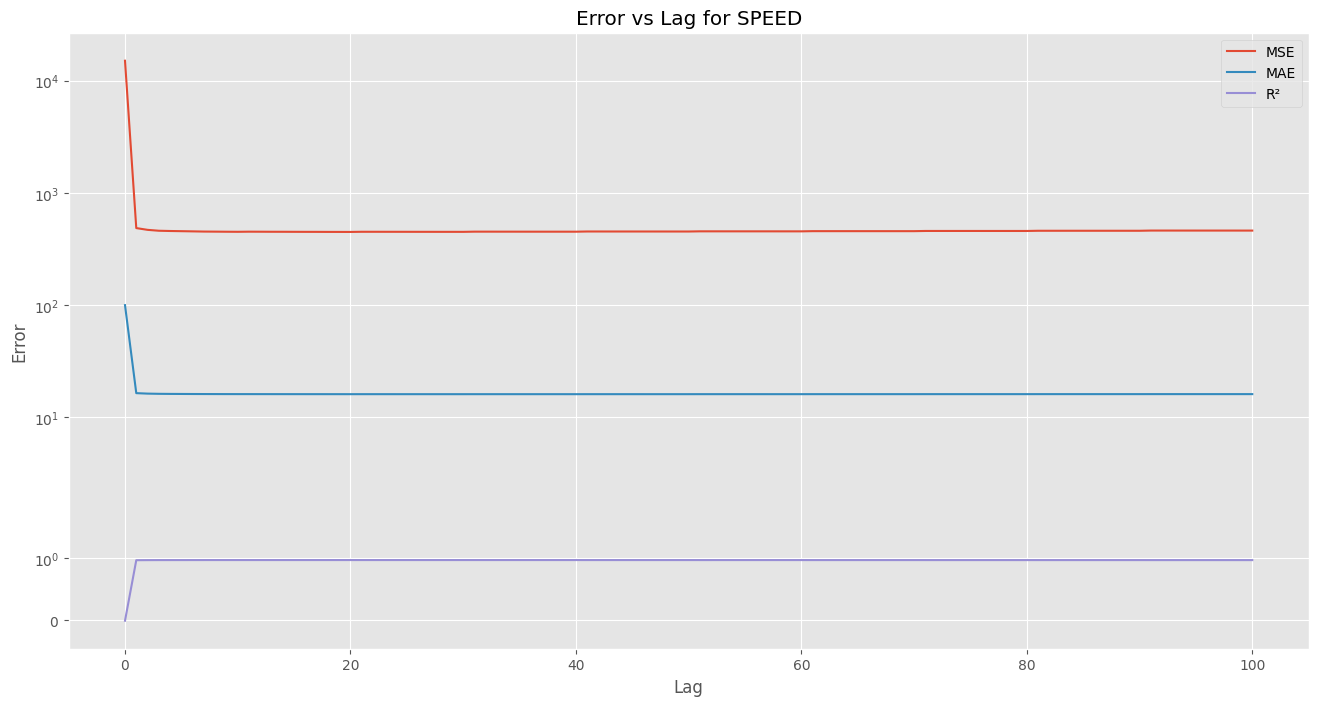

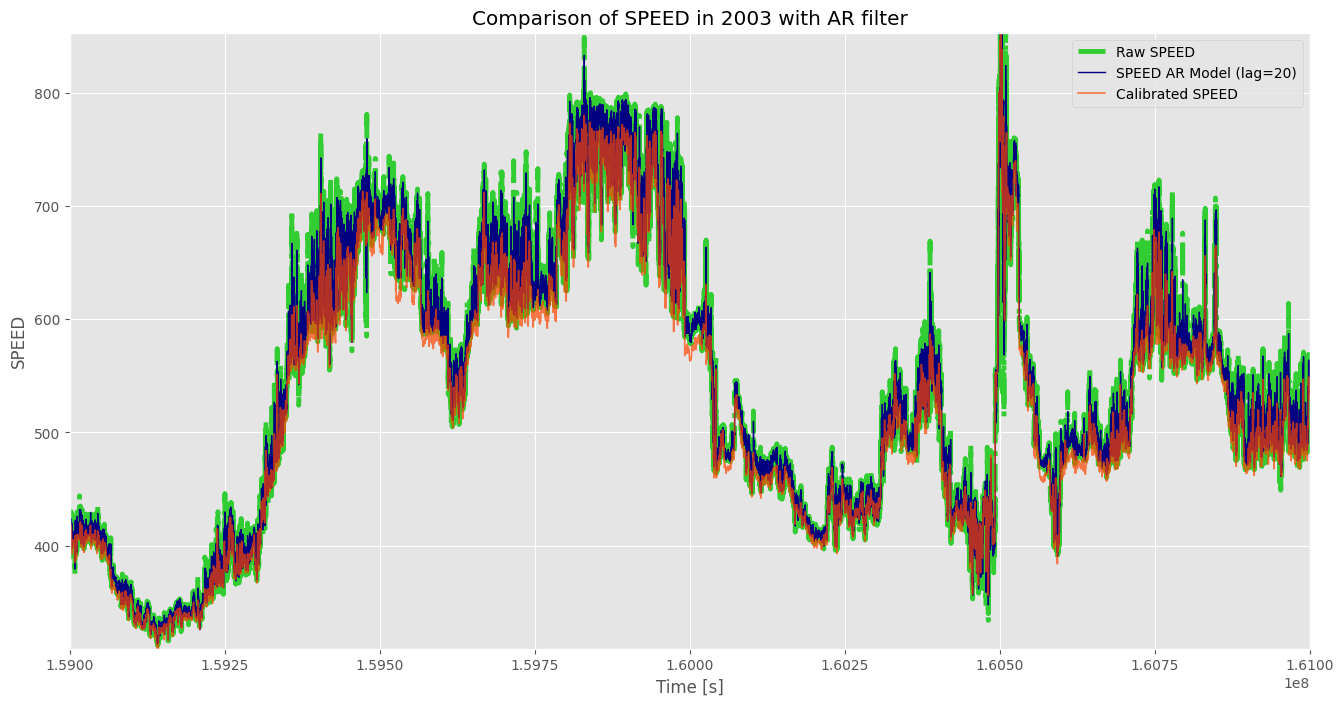

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:              1003100
Model:                    AutoReg(20)   Log Likelihood            -3788340.241
Method:               Conditional MLE   S.D. of innovations             10.567
Date:                Tue, 12 Nov 2024   AIC                        7576724.483
Time:                        15:52:56   BIC                        7576984.492
Sample:                            20   HQIC                       7576796.027
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6938      0.048     14.470      0.000       0.600       0.788
y.L1           0.6154      0.001    616.471      0.000       0.613       0.617
y.L2           0.1302      0.001    111.117      0.0

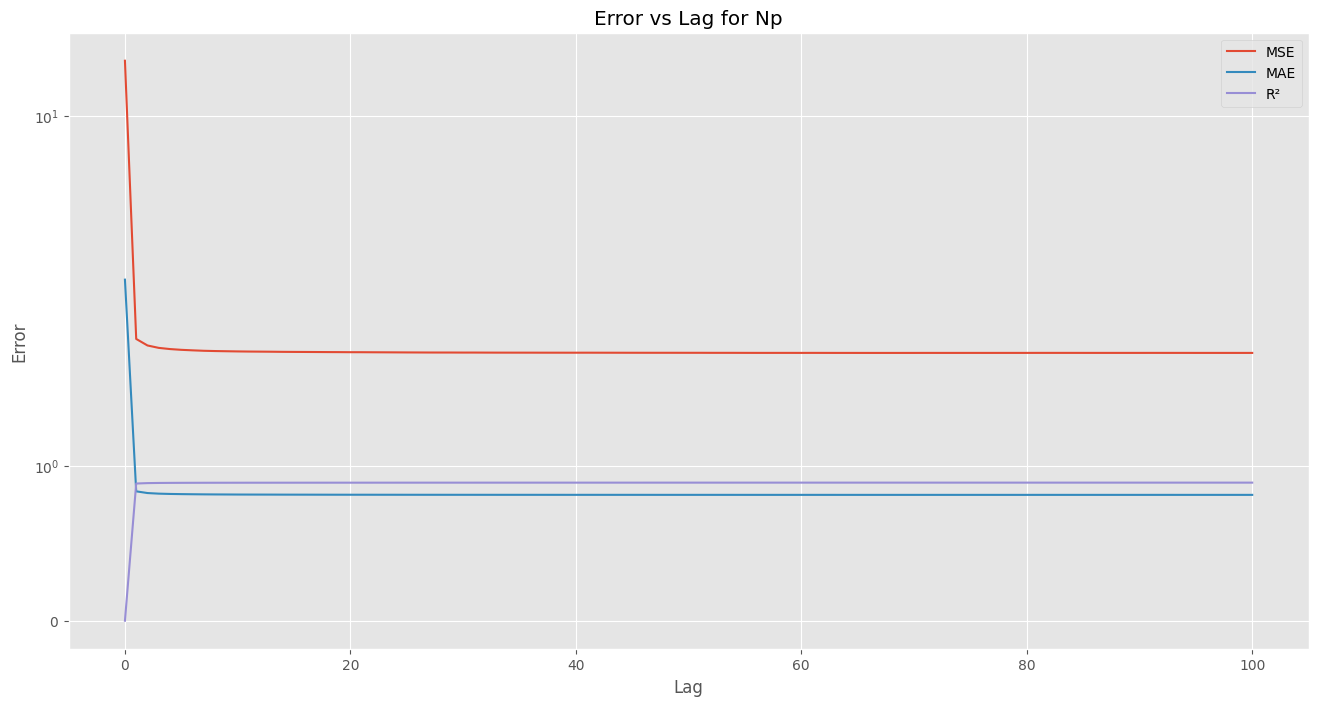

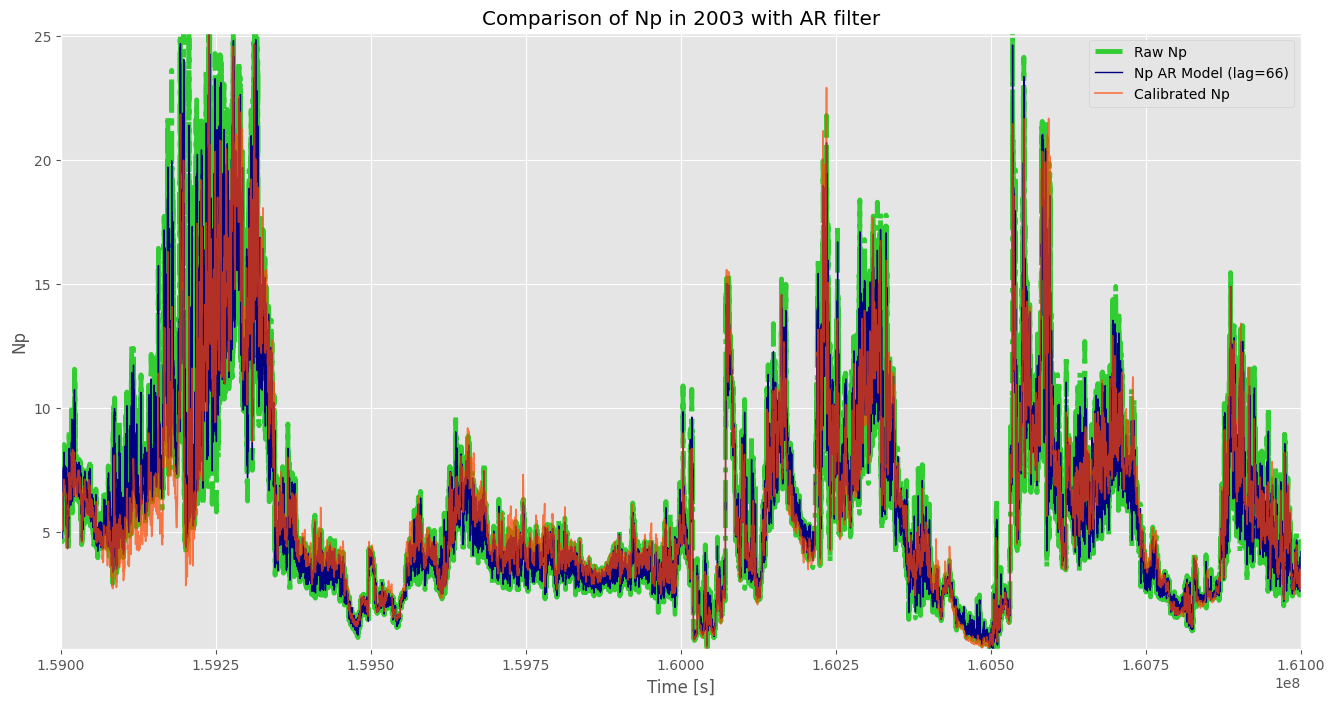

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:              1003100
Model:                    AutoReg(66)   Log Likelihood             -919835.151
Method:               Conditional MLE   S.D. of innovations              0.605
Date:                Tue, 12 Nov 2024   AIC                        1839806.301
Time:                        16:13:12   BIC                        1840609.962
Sample:                            66   HQIC                       1840027.439
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0219      0.001     20.409      0.000       0.020       0.024
y.L1           0.7045      0.001    705.544      0.000       0.703       0.706
y.L2           0.1147      0.001     93.912      0.0

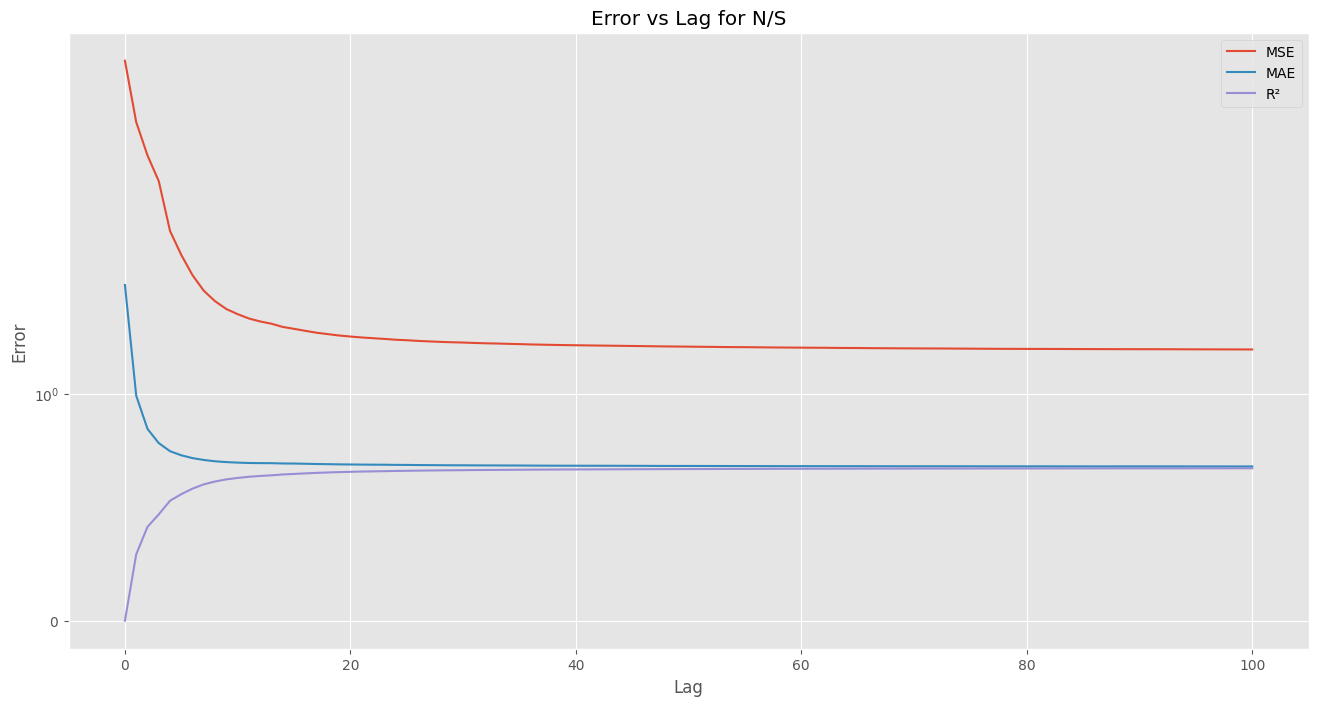

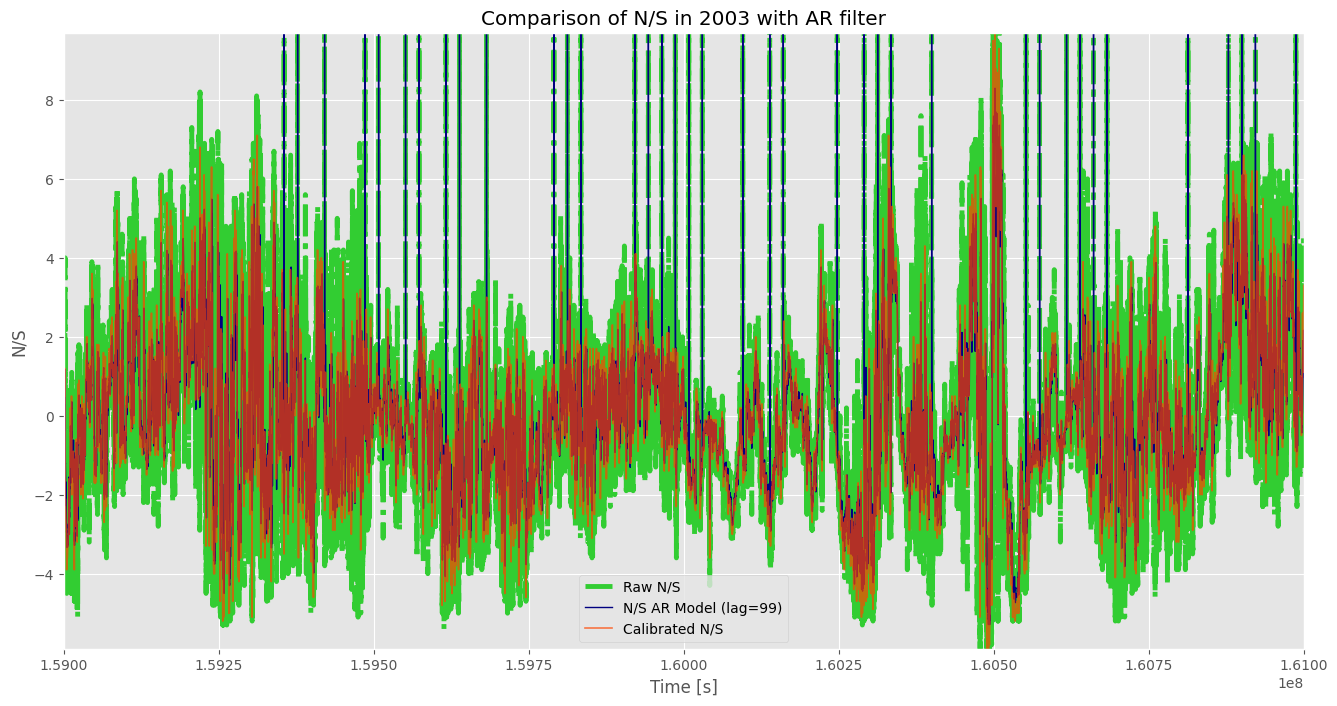

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:              1003100
Model:                    AutoReg(99)   Log Likelihood            -2388678.710
Method:               Conditional MLE   S.D. of innovations              2.618
Date:                Tue, 12 Nov 2024   AIC                        4777559.419
Time:                        16:34:37   BIC                        4778753.088
Sample:                            99   HQIC                       4777887.873
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0183      0.003     -6.911      0.000      -0.023      -0.013
y.L1           0.1563      0.001    156.527      0.000       0.154       0.158
y.L2           0.1042      0.001    103.076      0.0

In [ ]:
"""
columns = ["SPEED", "Np", "N/S"]

for year in [2003]:
    for column in columns:
        time = Raw_data[year]["Seconds"]

        # Uso
        data_sheet = np.array(Raw_data[year][column])  # Convierte a array si no está en ese formato
        max_lag_allowed = find_max_lag(data_sheet)

        n = 100#find_max_lag(Raw_data[year][column], max_memory_gb=0.125)
        cutoff_frequencies = np.linspace(0, n, num=n+1)
        #print(cutoff_frequencies)

        optimal_mse, optimal_mae, optimal_r2 = find_best_cutoff_frequency(year, column, cutoff_frequencies, autoregressive)

        optimal_cutoffs = np.min([optimal_mse, optimal_mae, optimal_r2])
        for f in [optimal_cutoffs]:
            filtered_signal, model = autoregressive(np.array(Raw_data[year][column]), int(f))
            
            plt.figure(figsize=(16, 8))
            plt.plot(time, Raw_data[year][column], label=f'Raw {column}', color="limegreen", linewidth=3.5, linestyle="-.")
            plt.plot(time, filtered_signal, label=f'{column} AR Model (lag={int(f)})', color="navy", linewidth=1)
            plt.plot(Calibrated_data[year]["Seconds"], Calibrated_data[year][column], label=f'Calibrated {column}', color="orangered", linewidth=1.2, alpha=0.7)
            plt.xlim(1.59e8, 1.61e8)
            plt.ylim(np.min(Calibrated_data[year][column][(Calibrated_data[year]["Seconds"] > 1.59e8) & (Calibrated_data[year]["Seconds"] < 1.61e8)]),
                    np.max(Calibrated_data[year][column][(Calibrated_data[year]["Seconds"] > 1.59e8) & (Calibrated_data[year]["Seconds"] < 1.61e8)]))
            plt.title(f'Comparison of {column} in {year} with AR filter')
            plt.xlabel('Time [s]')
            plt.ylabel(column)
            plt.legend()
            plt.show()

            print(model.summary())
"""

### Errors metrics for raw data:

In [11]:
for year in [2003]:
    for column in columns:
        data_sheet = Raw_data[year][column]
        calibrated_sheet = Calibrated_data[year][column]
        time_raw = Raw_data[year]["Seconds"]
        time_calibrated = Calibrated_data[year]["Seconds"]

        # Common times between raw and calibrated data
        common_time = np.intersect1d(time_raw, time_calibrated)
        idx_raw_common = np.where(np.isin(time_raw, common_time))[0]
        idx_calibrated_common = np.where(np.isin(time_calibrated, common_time))[0]

        mse_errors, mae_errors, r2_scores = [], [], []



        # Calculate error metrics on common values
        mse = mean_squared_error(calibrated_sheet[idx_calibrated_common], data_sheet[idx_raw_common])
        mae = mean_absolute_error(calibrated_sheet[idx_calibrated_common], data_sheet[idx_raw_common])
        r2 = r2_score(calibrated_sheet[idx_calibrated_common], data_sheet[idx_raw_common])

        mse_errors.append(mse)
        mae_errors.append(mae)
        r2_scores.append(r2)

        # Find the optimal cutoff frequency based on each metric
        min_mse_index = np.where(mse_errors == np.min(mse_errors))[0][-1]
        min_mae_index = np.where(mae_errors == np.min(mae_errors))[0][-1]
        max_r2_index = np.where(r2_scores == np.max(r2_scores))[0][-1]

        print(year)
        print(column)
        print(f"The maximum R^2 is {r2_scores[max_r2_index]}")
        print(f"The minimum MSE is {mse_errors[min_mse_index]}")
        print(f"The minimum MAE is {mae_errors[min_mae_index]}")

2003
SPEED
The maximum R^2 is 0.9702749717643561
The minimum MSE is 449.2707274959329
The minimum MAE is 16.089766750172167
2003
Np
The maximum R^2 is 0.8918096634604777
The minimum MSE is 1.6998225105546292
The minimum MAE is 0.804628467058577
2003
N/S
The maximum R^2 is -0.8351231357788464
The minimum MSE is 6.703169582705379
The minimum MAE is 0.633426486880321


                            AutoReg Model Results                             
Dep. Variable:                  SPEED   No. Observations:              1003100
Model:                     AutoReg(0)   Log Likelihood            -6255363.624
Method:               Conditional MLE   S.D. of innovations            123.605
Date:                Mon, 11 Nov 2024   AIC                       12510731.248
Time:                        23:32:05   BIC                       12510754.886
Sample:                             0   HQIC                      12510737.752
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        545.1928      0.123   4417.587      0.000     544.951     545.435


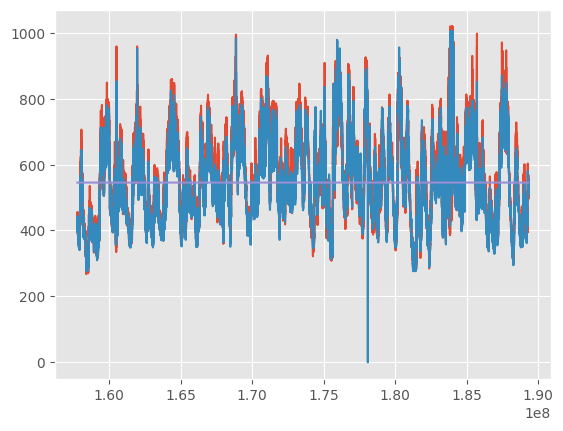

                            AutoReg Model Results                             
Dep. Variable:                  SPEED   No. Observations:              1003100
Model:                     AutoReg(1)   Log Likelihood            -3863787.332
Method:               Conditional MLE   S.D. of innovations             11.392
Date:                Mon, 11 Nov 2024   AIC                        7727580.665
Time:                        23:32:06   BIC                        7727616.120
Sample:                             1   HQIC                       7727590.421
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3209      0.051     45.116      0.000       2.220       2.422
SPEED.L1       0.9957    9.2e-05   1.08e+04      0.000       0.996       0.996
                                    Roots           

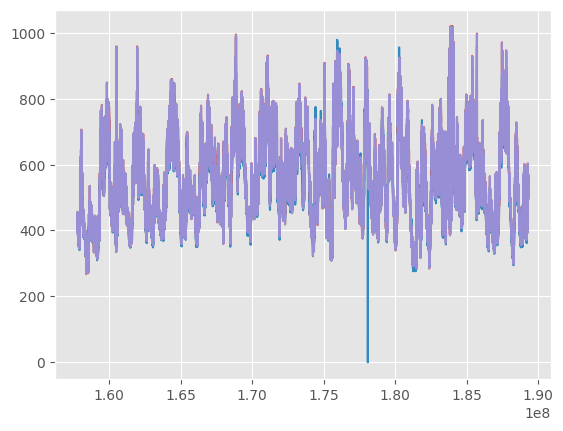

                            AutoReg Model Results                             
Dep. Variable:                  SPEED   No. Observations:              1003100
Model:                     AutoReg(2)   Log Likelihood            -3820711.061
Method:               Conditional MLE   S.D. of innovations             10.913
Date:                Mon, 11 Nov 2024   AIC                        7641430.122
Time:                        23:32:06   BIC                        7641477.397
Sample:                             2   HQIC                       7641443.130
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6554      0.049     33.556      0.000       1.559       1.752
SPEED.L1       0.7101      0.001    742.395      0.000       0.708       0.712
SPEED.L2       0.2869      0.001    299.922      0.0

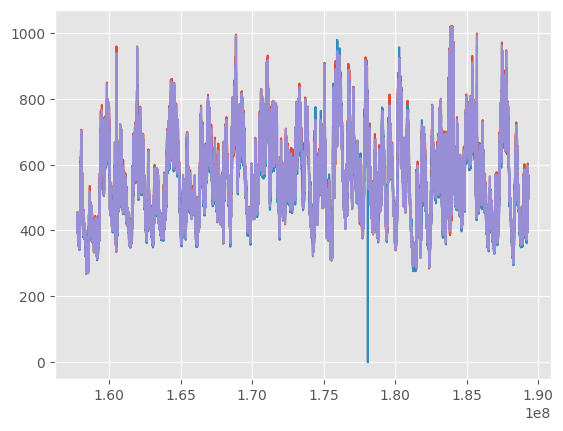

                            AutoReg Model Results                             
Dep. Variable:                  SPEED   No. Observations:              1003100
Model:                     AutoReg(3)   Log Likelihood            -3806338.571
Method:               Conditional MLE   S.D. of innovations             10.758
Date:                Mon, 11 Nov 2024   AIC                        7612687.142
Time:                        23:32:07   BIC                        7612746.235
Sample:                             3   HQIC                       7612703.402
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3773      0.049     28.308      0.000       1.282       1.473
SPEED.L1       0.6619      0.001    672.470      0.000       0.660       0.664
SPEED.L2       0.1675      0.001    142.744      0.0

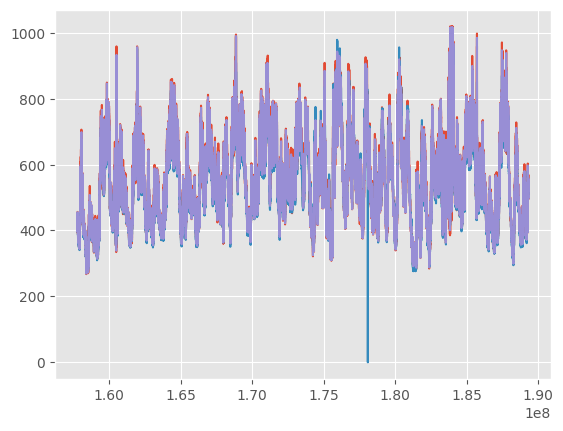

                            AutoReg Model Results                             
Dep. Variable:                  SPEED   No. Observations:              1003100
Model:                     AutoReg(4)   Log Likelihood            -3800786.026
Method:               Conditional MLE   S.D. of innovations             10.699
Date:                Mon, 11 Nov 2024   AIC                        7601584.052
Time:                        23:32:08   BIC                        7601654.964
Sample:                             4   HQIC                       7601603.564
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2330      0.048     25.472      0.000       1.138       1.328
SPEED.L1       0.6443      0.001    648.829      0.000       0.642       0.646
SPEED.L2       0.1500      0.001    127.194      0.0

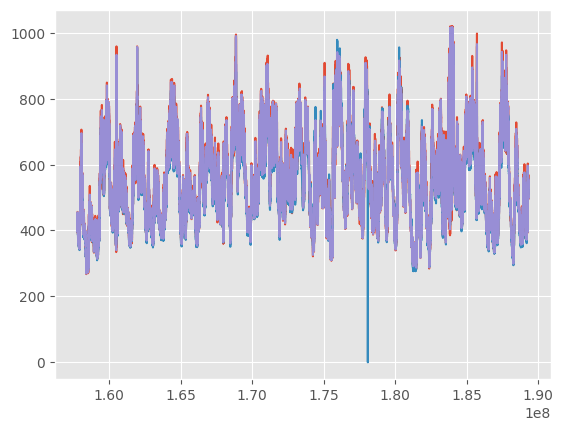

                            AutoReg Model Results                             
Dep. Variable:                  SPEED   No. Observations:              1003100
Model:                     AutoReg(5)   Log Likelihood            -3797803.876
Method:               Conditional MLE   S.D. of innovations             10.667
Date:                Mon, 11 Nov 2024   AIC                        7595621.752
Time:                        23:32:10   BIC                        7595704.482
Sample:                             5   HQIC                       7595644.516
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1382      0.048     23.576      0.000       1.044       1.233
SPEED.L1       0.6362      0.001    639.060      0.000       0.634       0.638
SPEED.L2       0.1424      0.001    120.696      0.0

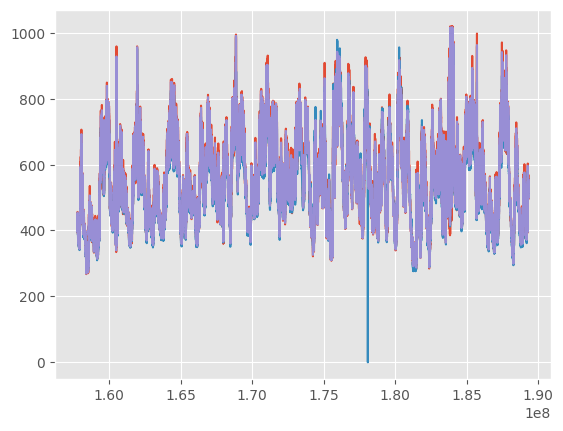

                            AutoReg Model Results                             
Dep. Variable:                  SPEED   No. Observations:              1003100
Model:                     AutoReg(6)   Log Likelihood            -3795899.025
Method:               Conditional MLE   S.D. of innovations             10.647
Date:                Mon, 11 Nov 2024   AIC                        7591814.051
Time:                        23:32:11   BIC                        7591908.600
Sample:                             6   HQIC                       7591840.067
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0683      0.048     22.164      0.000       0.974       1.163
SPEED.L1       0.6314      0.001    633.624      0.000       0.629       0.633
SPEED.L2       0.1390      0.001    117.905      0.0

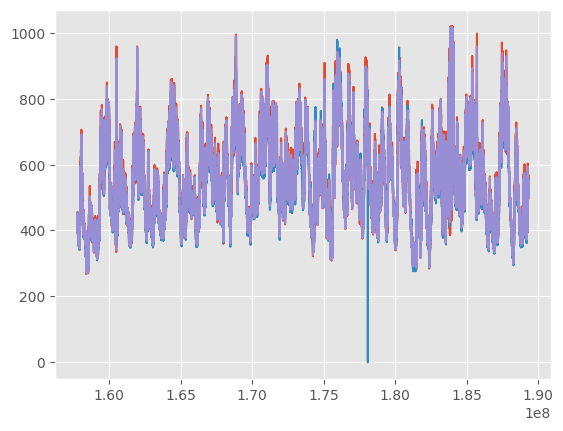

                            AutoReg Model Results                             
Dep. Variable:                  SPEED   No. Observations:              1003100
Model:                     AutoReg(7)   Log Likelihood            -3794086.957
Method:               Conditional MLE   S.D. of innovations             10.628
Date:                Mon, 11 Nov 2024   AIC                        7588191.914
Time:                        23:32:12   BIC                        7588298.281
Sample:                             7   HQIC                       7588221.182
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0043      0.048     20.869      0.000       0.910       1.099
SPEED.L1       0.6278      0.001    629.862      0.000       0.626       0.630
SPEED.L2       0.1367      0.001    116.129      0.0

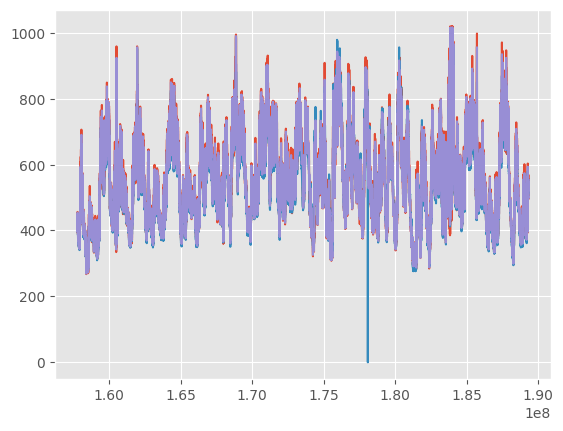

                            AutoReg Model Results                             
Dep. Variable:                  SPEED   No. Observations:              1003100
Model:                     AutoReg(8)   Log Likelihood            -3793114.317
Method:               Conditional MLE   S.D. of innovations             10.617
Date:                Mon, 11 Nov 2024   AIC                        7586248.634
Time:                        23:32:14   BIC                        7586366.820
Sample:                             8   HQIC                       7586281.155
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9603      0.048     19.968      0.000       0.866       1.055
SPEED.L1       0.6251      0.001    626.691      0.000       0.623       0.627
SPEED.L2       0.1357      0.001    115.336      0.0

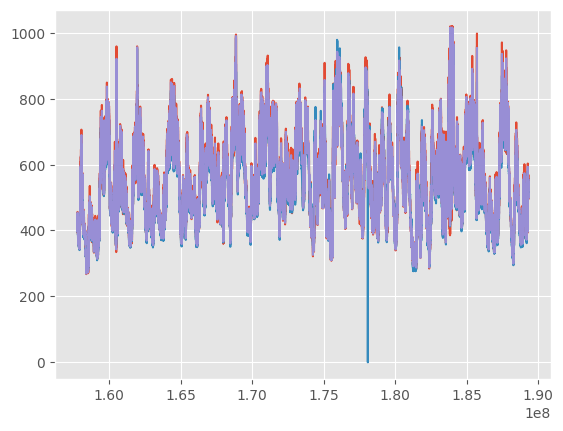

                            AutoReg Model Results                             
Dep. Variable:                  SPEED   No. Observations:              1003100
Model:                     AutoReg(9)   Log Likelihood            -3792071.259
Method:               Conditional MLE   S.D. of innovations             10.606
Date:                Mon, 11 Nov 2024   AIC                        7584164.517
Time:                        23:32:15   BIC                        7584294.522
Sample:                             9   HQIC                       7584200.290
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9167      0.048     19.077      0.000       0.822       1.011
SPEED.L1       0.6231      0.001    624.730      0.000       0.621       0.625
SPEED.L2       0.1342      0.001    114.157      0.0

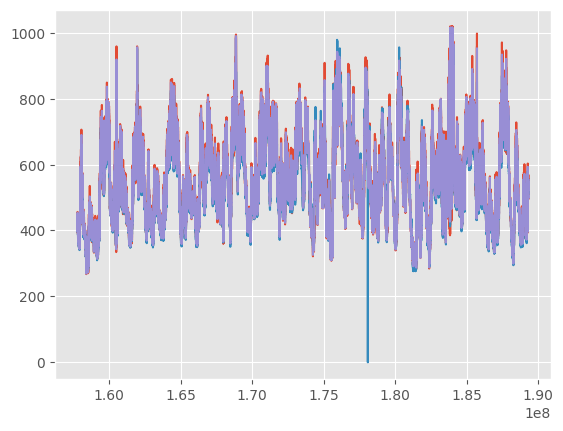

                            AutoReg Model Results                             
Dep. Variable:                  SPEED   No. Observations:              1003100
Model:                    AutoReg(10)   Log Likelihood            -3791415.865
Method:               Conditional MLE   S.D. of innovations             10.599
Date:                Mon, 11 Nov 2024   AIC                        7582855.730
Time:                        23:32:17   BIC                        7582997.553
Sample:                            10   HQIC                       7582894.755
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8837      0.048     18.400      0.000       0.790       0.978
SPEED.L1       0.6215      0.001    622.844      0.000       0.620       0.623
SPEED.L2       0.1336      0.001    113.745      0.0

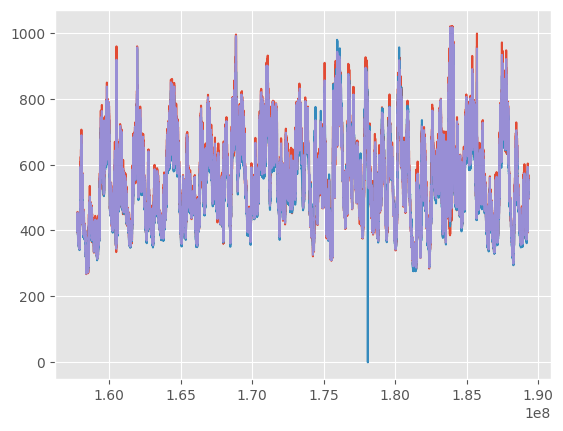

                            AutoReg Model Results                             
Dep. Variable:                  SPEED   No. Observations:              1003100
Model:                    AutoReg(11)   Log Likelihood            -3790917.782
Method:               Conditional MLE   S.D. of innovations             10.594
Date:                Mon, 11 Nov 2024   AIC                        7581861.565
Time:                        23:32:19   BIC                        7582015.206
Sample:                            11   HQIC                       7581903.841
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8560      0.048     17.829      0.000       0.762       0.950
SPEED.L1       0.6203      0.001    621.612      0.000       0.618       0.622
SPEED.L2       0.1329      0.001    113.163      0.0

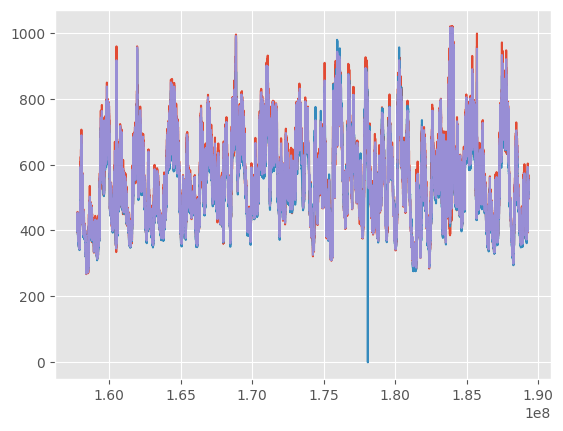

                            AutoReg Model Results                             
Dep. Variable:                  SPEED   No. Observations:              1003100
Model:                    AutoReg(12)   Log Likelihood            -3790480.572
Method:               Conditional MLE   S.D. of innovations             10.590
Date:                Mon, 11 Nov 2024   AIC                        7580989.143
Time:                        23:32:21   BIC                        7581154.604
Sample:                            12   HQIC                       7581034.672
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8309      0.048     17.311      0.000       0.737       0.925
SPEED.L1       0.6194      0.001    620.649      0.000       0.617       0.621
SPEED.L2       0.1324      0.001    112.787      0.0

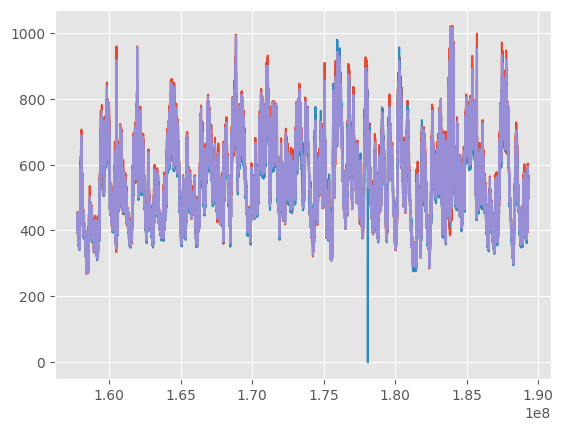

                            AutoReg Model Results                             
Dep. Variable:                  SPEED   No. Observations:              1003100
Model:                    AutoReg(13)   Log Likelihood            -3790147.065
Method:               Conditional MLE   S.D. of innovations             10.586
Date:                Mon, 11 Nov 2024   AIC                        7580324.130
Time:                        23:32:23   BIC                        7580501.409
Sample:                            13   HQIC                       7580372.911
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8096      0.048     16.870      0.000       0.716       0.904
SPEED.L1       0.6187      0.001    619.829      0.000       0.617       0.621
SPEED.L2       0.1321      0.001    112.530      0.0

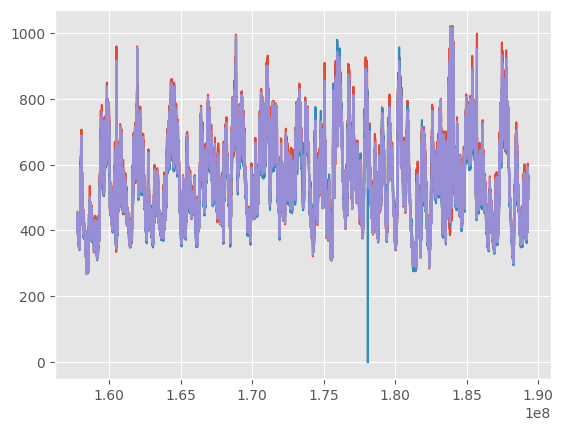

                            AutoReg Model Results                             
Dep. Variable:                  SPEED   No. Observations:              1003100
Model:                    AutoReg(14)   Log Likelihood            -3789913.431
Method:               Conditional MLE   S.D. of innovations             10.584
Date:                Mon, 11 Nov 2024   AIC                        7579858.862
Time:                        23:32:25   BIC                        7580047.960
Sample:                            14   HQIC                       7579910.895
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7923      0.048     16.512      0.000       0.698       0.886
SPEED.L1       0.6181      0.001    619.216      0.000       0.616       0.620
SPEED.L2       0.1318      0.001    112.301      0.0

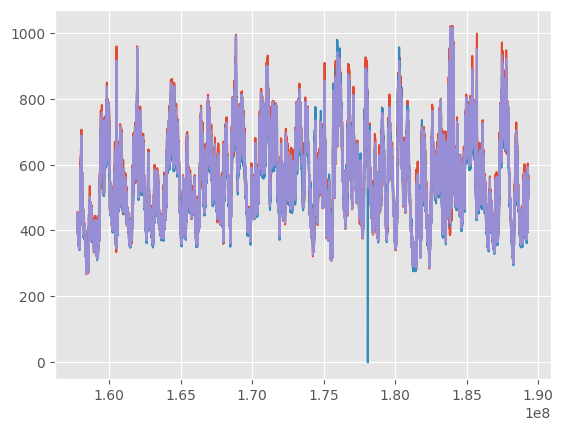

                            AutoReg Model Results                             
Dep. Variable:                  SPEED   No. Observations:              1003100
Model:                    AutoReg(15)   Log Likelihood            -3789632.494
Method:               Conditional MLE   S.D. of innovations             10.581
Date:                Mon, 11 Nov 2024   AIC                        7579298.987
Time:                        23:32:27   BIC                        7579499.903
Sample:                            15   HQIC                       7579354.272
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7737      0.048     16.126      0.000       0.680       0.868
SPEED.L1       0.6176      0.001    618.740      0.000       0.616       0.620
SPEED.L2       0.1315      0.001    112.077      0.0

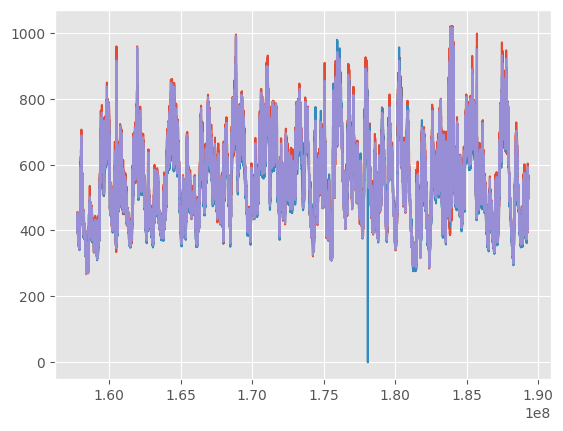

                            AutoReg Model Results                             
Dep. Variable:                  SPEED   No. Observations:              1003100
Model:                    AutoReg(16)   Log Likelihood            -3789227.935
Method:               Conditional MLE   S.D. of innovations             10.577
Date:                Mon, 11 Nov 2024   AIC                        7578491.869
Time:                        23:32:29   BIC                        7578704.604
Sample:                            16   HQIC                       7578550.406
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7519      0.048     15.676      0.000       0.658       0.846
SPEED.L1       0.6170      0.001    618.150      0.000       0.615       0.619
SPEED.L2       0.1313      0.001    111.954      0.0

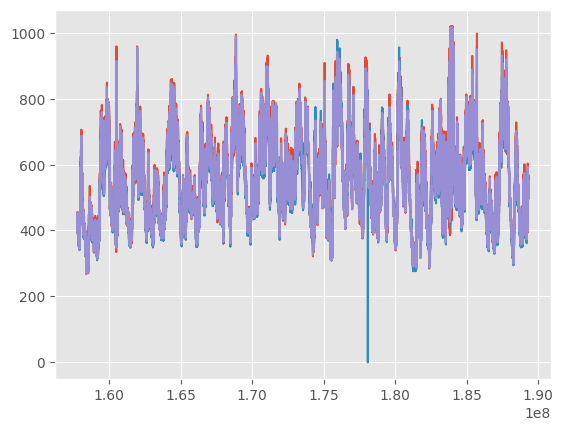

                            AutoReg Model Results                             
Dep. Variable:                  SPEED   No. Observations:              1003100
Model:                    AutoReg(17)   Log Likelihood            -3789105.217
Method:               Conditional MLE   S.D. of innovations             10.575
Date:                Mon, 11 Nov 2024   AIC                        7578248.433
Time:                        23:32:32   BIC                        7578472.986
Sample:                            17   HQIC                       7578310.222
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7403      0.048     15.434      0.000       0.646       0.834
SPEED.L1       0.6165      0.001    617.539      0.000       0.615       0.618
SPEED.L2       0.1312      0.001    111.886      0.0

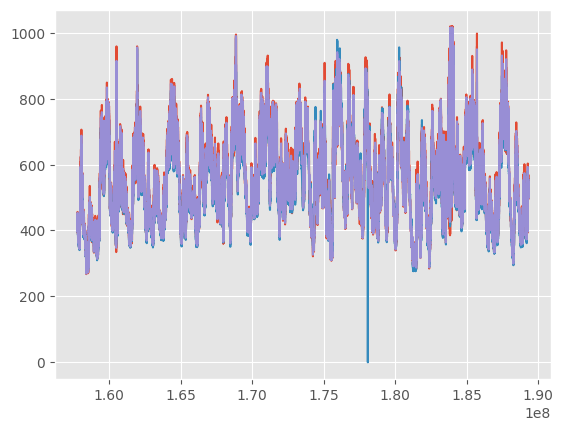

                            AutoReg Model Results                             
Dep. Variable:                  SPEED   No. Observations:              1003100
Model:                    AutoReg(18)   Log Likelihood            -3788678.661
Method:               Conditional MLE   S.D. of innovations             10.571
Date:                Mon, 11 Nov 2024   AIC                        7577397.323
Time:                        23:32:35   BIC                        7577633.694
Sample:                            18   HQIC                       7577462.363
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7189      0.048     14.992      0.000       0.625       0.813
SPEED.L1       0.6161      0.001    617.276      0.000       0.614       0.618
SPEED.L2       0.1307      0.001    111.454      0.0

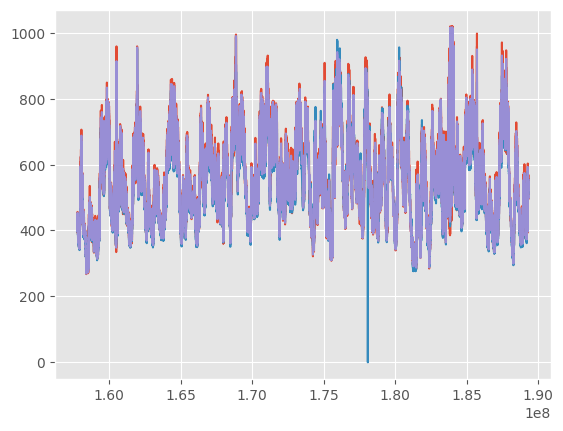

                            AutoReg Model Results                             
Dep. Variable:                  SPEED   No. Observations:              1003100
Model:                    AutoReg(19)   Log Likelihood            -3788583.087
Method:               Conditional MLE   S.D. of innovations             10.570
Date:                Mon, 11 Nov 2024   AIC                        7577208.173
Time:                        23:32:37   BIC                        7577456.363
Sample:                            19   HQIC                       7577276.466
                              1003100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7092      0.048     14.789      0.000       0.615       0.803
SPEED.L1       0.6157      0.001    616.678      0.000       0.614       0.618
SPEED.L2       0.1307      0.001    111.493      0.0

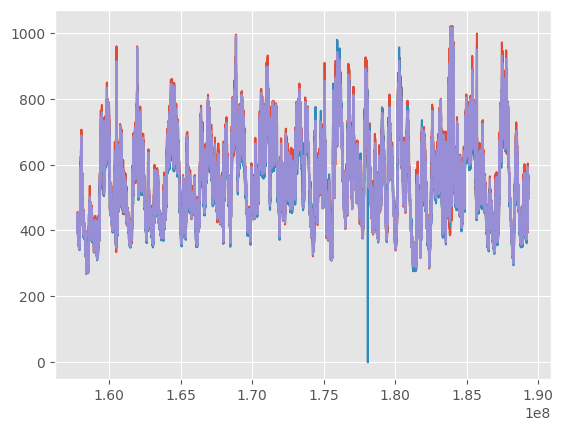

In [ ]:
"""
year = 2003
column = "SPEED"
for lag in range(20):
    data_sheet = Raw_data[year][column]
    calibrated_sheet = Calibrated_data[year][column]
    time_raw = Raw_data[year]["Seconds"]
    time_calibrated = Calibrated_data[year]["Seconds"]
    data, model = autoregressive(data_sheet, time_raw, lag)
    print(model.summary())
    plt.plot(time_raw, data_sheet)
    plt.plot(time_calibrated, calibrated_sheet)
    plt.plot(time_raw, data)
    
    plt.show()
"""